In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_onkk.csv')
df.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125


In [4]:
# Count unique station IDs
unique_stations = df['ID'].nunique()
print(f"Total number of unique stations in the dataset: {unique_stations}")

# List all unique station IDs
unique_station_ids = df['ID'].unique()
print("\nUnique station IDs:")
print(unique_station_ids)

Total number of unique stations in the dataset: 26

Unique station IDs:
[ 19  79 163 300  51  52  53  62  66  71 155 156 157 158 160 162 159 195
   5 169  60 172 173  54 175 161]


In [6]:
# Group by station ID and get the first row for each station
# This assumes that lat/long coordinates are consistent for each station
station_info = df.groupby('ID').first().reset_index()

# Select relevant columns - assuming 'lat' and 'long' are column names, adjust as needed
station_details = station_info[['ID', 'lat', 'lon']]
station_details

,ID,lat,lon
0,5,21.021300,105.850900
1,19,21.049750,105.741870
2,51,21.200344,105.948544
3,52,21.123247,106.288330
4,53,21.152745,106.111371
5,54,21.031000,106.529100
6,60,21.187340,106.074296
7,62,21.151807,106.151880
8,66,21.163853,105.923565
9,71,21.027221,106.034210


In [8]:
# Create a clean summary dataframe
station_summary = station_details.copy()

# Add additional statistics if needed
station_summary['data_points'] = df.groupby('ID').size().values

# Display the summary table
station_summary

,ID,lat,lon,data_points
0,5,21.021300,105.850900,23
1,19,21.049750,105.741870,525
2,51,21.200344,105.948544,572
3,52,21.123247,106.288330,586
4,53,21.152745,106.111371,442
5,54,21.031000,106.529100,301
6,60,21.187340,106.074296,543
7,62,21.151807,106.151880,674
8,66,21.163853,105.923565,394
9,71,21.027221,106.034210,417


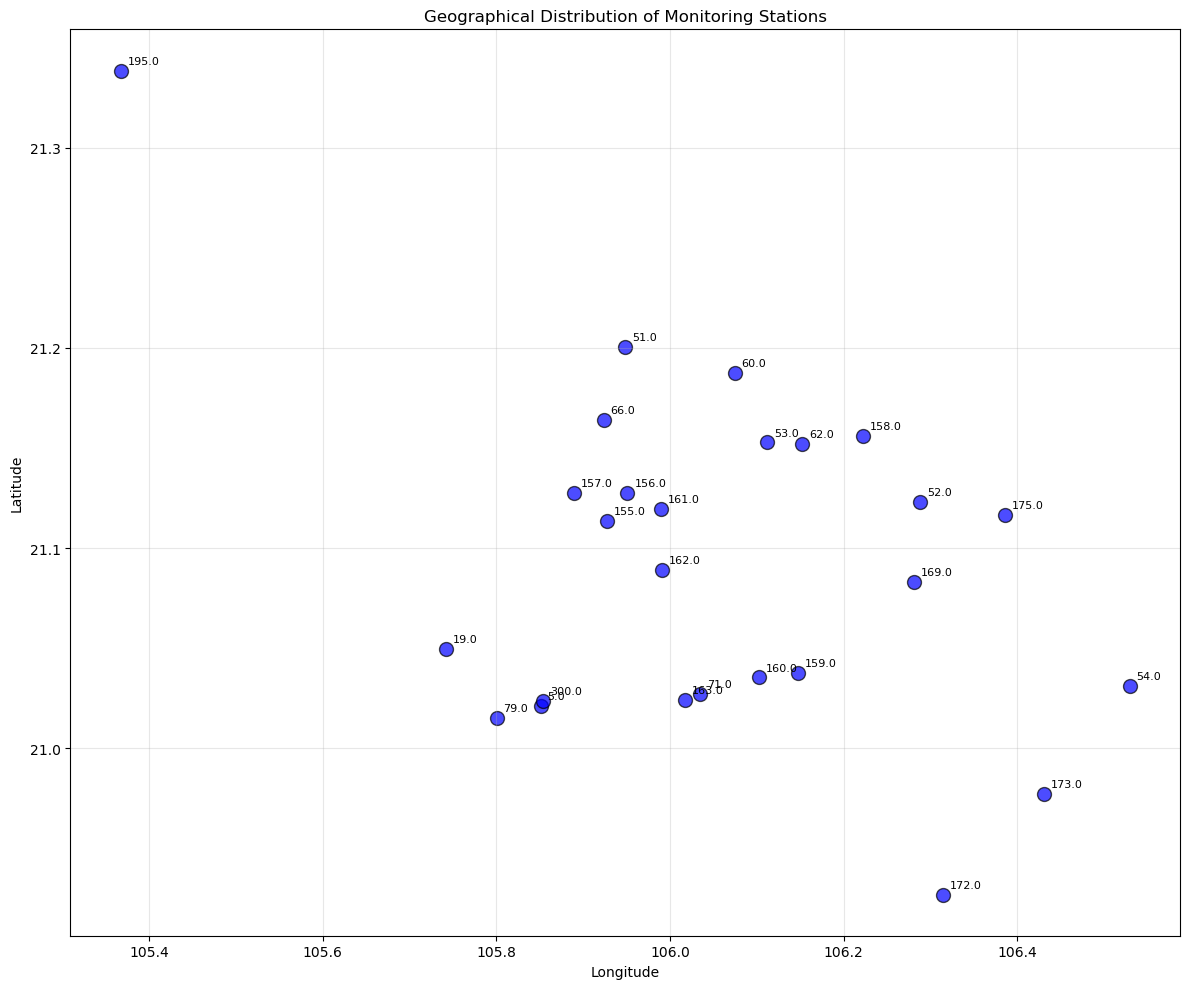

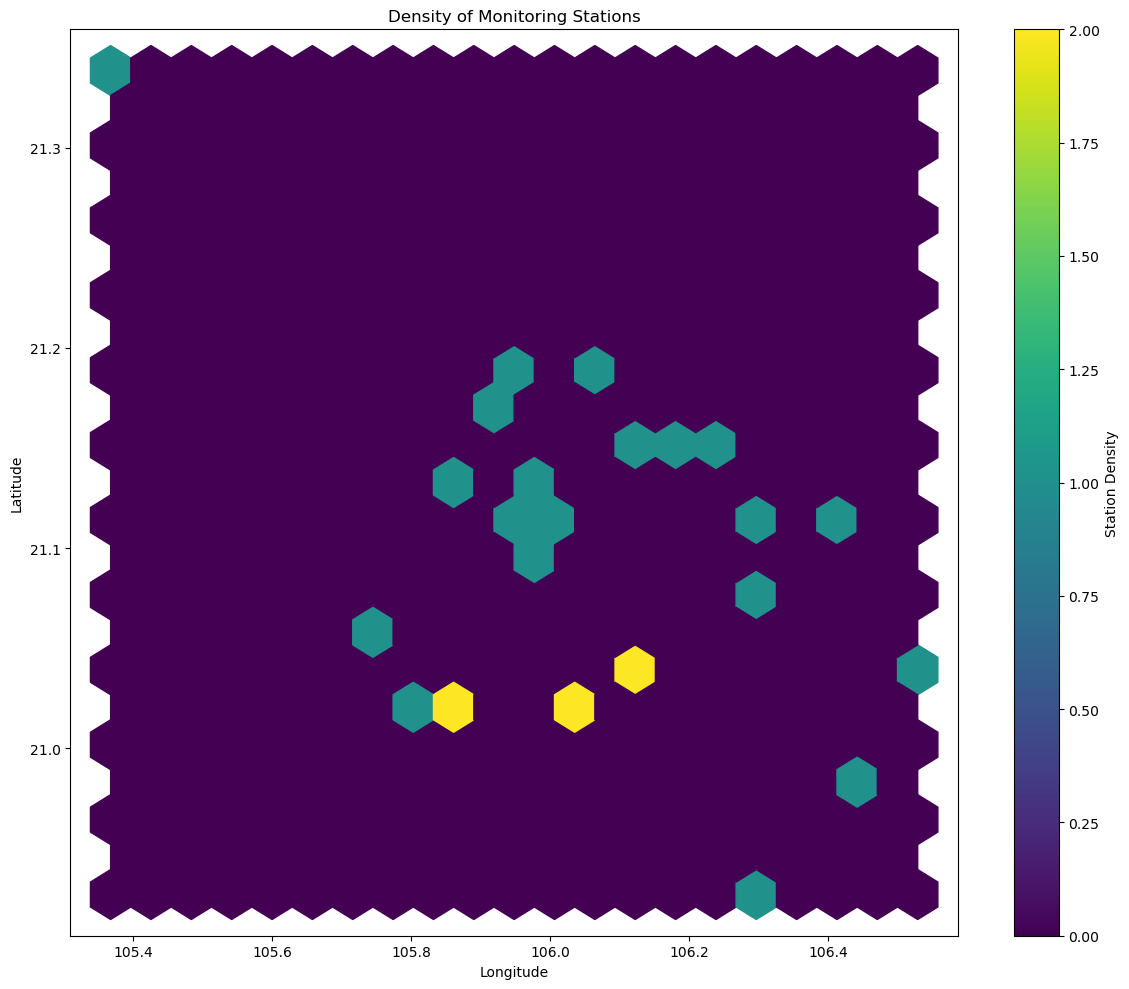

In [9]:
# Create a scatter plot of station locations
plt.figure(figsize=(12, 10))
plt.scatter(station_summary['lon'], station_summary['lat'], 
            alpha=0.7, c='blue', s=100, edgecolors='black')

# Add labels for each station
for i, row in station_summary.iterrows():
    plt.annotate(row['ID'], 
                 (row['lon'], row['lat']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8)

plt.title('Geographical Distribution of Monitoring Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)

# Add a basemap if available, otherwise just use coordinates
plt.tight_layout()
plt.show()

# Optional: Create a heatmap if you have many stations
if len(station_summary) > 10:
    plt.figure(figsize=(12, 10))
    plt.hexbin(station_summary['lon'], station_summary['lat'], gridsize=20, cmap='viridis')
    plt.colorbar(label='Station Density')
    plt.title('Density of Monitoring Stations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

In [11]:
station_summary.to_csv('station_summary.csv', index=False)